In [32]:
!pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import plotly.express as px
from imblearn.under_sampling import RandomUnderSampler

In [2]:
raw_data_x = pd.read_csv(r'C:\Users\kapil\SMS_Spam_Detection\smsspamcollection\SMSSpamCollection', sep= '\t',names=["label_x","message_x"])
raw_data_x


,label_x,message_x
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [208]:
#Checking for datatype of columns
raw_data_x.dtypes


label_x      object
message_x    object
dtype: object

In [24]:
len(raw_data_x)

5572

In [26]:
raw_data_x['label_x'].value_counts()

ham     4825
spam     747
Name: label_x, dtype: int64

In [28]:
#Plotting count of legit and spam messages in data
fig = px.histogram(raw_data_x, x="label_x",title='Distribution of Legit and Spam SMS',labels={'label_x':'Label'})
fig.show()

The figure shows that dataset is unbalanced. Hence, we will try to perform oversampling.
We will start by separating the class that will be 0 and class 1.

In [14]:
# class count
class_count_ham, class_count_spam = raw_data['label'].value_counts()

# Separate class
class_ham = raw_data[raw_data['label'] == 'ham']
class_spam = raw_data[raw_data['label'] == 'spam']# print the shape of the class
print('class ham:', class_ham.shape)
print('class spam:', class_spam.shape)




class ham: (4825, 2)
class spam: (747, 2)


In [4]:
#for raw_data_x

# class count
class_count_ham, class_count_spam = raw_data_x['label_x'].value_counts()

# Separate class
class_ham = raw_data_x[raw_data_x['label_x'] == 'ham']
class_spam = raw_data_x[raw_data_x['label_x'] == 'spam']# print the shape of the class
print('class ham:', class_ham.shape)
print('class spam:', class_spam.shape)




class ham: (4825, 2)
class spam: (747, 2)


Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with. This is done until the majority and minority class is balanced out.

<AxesSubplot:title={'center':'count (target)'}>

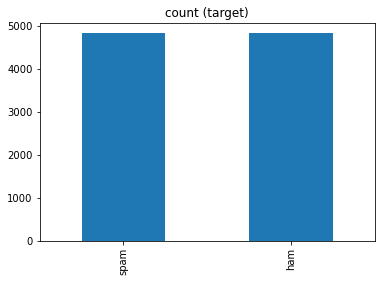

In [175]:
class_spam_over = class_spam.sample(class_count_ham, replace=True)

bal_raw_data = pd.concat([class_spam_over, class_ham], axis=0)

bal_raw_data['label'].value_counts().plot(kind='bar', title='count (target)')

<AxesSubplot:title={'center':'count (target)'}>

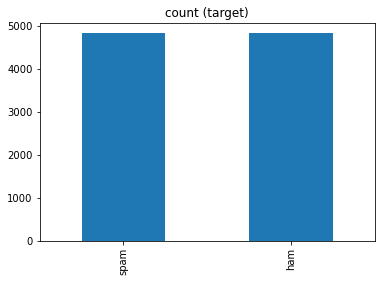

In [5]:
class_spam_over = class_spam.sample(class_count_ham, replace=True)

bal_raw_data_x = pd.concat([class_spam_over, class_ham], axis=0)

bal_raw_data_x['label_x'].value_counts().plot(kind='bar', title='count (target)')

In [198]:
bal_raw_data

,label,message
11,spam,six chances to win cash from to po...
2108,spam,free day sexy st george s day pic of jordan tx...
788,spam,free top polyphonic tones call ...
2353,spam,please call immediately as there i...
929,spam,money you r a lucky winner claim your p...
...,...,...
5565,ham,huh y lei
5568,ham,will b going to esplanade fr home
5569,ham,pity was in mood for that so any other s...
5570,ham,the guy did some bitching but i acted like i d...


In [176]:
# bal_raw_data['label'] = bal_raw_data['label'].apply(str)
# bal_raw_data['message'] = bal_raw_data['message'].apply(str)
# bal_raw_data.dtypes
#bal_raw_data['message'][56]= ""
#dataframe['column_name']=dataframe['column_name'].apply(str)
#str(bal_raw_data['message'][563])
#prep = re.sub('[^a-zA-Z]', ' ', str(bal_raw_data['message'][563]))
#prep
#bal_raw_data.drop(563, axis = 0)

#bal_raw_data['message'][563]

### Data Cleaning and Preprocessing:

In [6]:
import re  #Regular Expression
import nltk 
nltk.download('stopwords')

from nltk.corpus import stopwords #For removing stopwords
from nltk.stem.porter import PorterStemmer #For stemming

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kapil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
ps = PorterStemmer()
corpus = []

for i in range(0, len(raw_data)):
    prep = re.sub('[^a-zA-Z]', ' ', str(raw_data['message'][i])) #Keep only alphabets
    #prep = ''.join(filter(str.isalnum, bal_raw_data['message'][i]))
    #prep = prep.lower() #converted to lowercase
    prep = prep.split() #split the message
    
    #Stemming
    
    prep = [ps.stem(word) for word in prep if not word in stopwords.words('english')]
    prep = ' '.join(prep)
    #added to corpus
    corpus.append(prep)

corpus    
    

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate t c appli',
 'u dun say earli hor u c alreadi say',
 'nah i think goe usf live around though',
 'freemsg hey darl week word back i like fun still tb ok xxx std chg send rcv',
 'even brother like speak they treat like aid patent',
 'as per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner as valu network custom select receivea prize reward to claim call claim code kl valid hour',
 'had mobil month u r entitl updat latest colour mobil camera free call the mobil updat co free',
 'i gonna home soon want talk stuff anymor tonight k i cri enough today',
 'six chanc win cash from pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent you week free membership prize jackpot txt word claim no t c www dbuk net lccltd pobo

In [9]:
ps = PorterStemmer()
corpus = []

for i in range(0, len(raw_data_x)):
    prep = re.sub('[^a-zA-Z]', ' ', str(raw_data_x['message_x'][i])) #Keep only alphabets
    #prep = ''.join(filter(str.isalnum, bal_raw_data['message'][i]))
    prep = prep.lower() #converted to lowercase
    prep = prep.split() #split the message
    
    #Stemming
    
    prep = [ps.stem(word) for word in prep if not word in stopwords.words('english')]
    prep = ' '.join(prep)
    #added to corpus
    corpus.append(prep)

corpus    
    

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [17]:
#Creating Bag of Words Model:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(raw_data['label'])
y = y.iloc[:,1].values

In [18]:
#Train test split:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0 )

In [21]:
#Training model using Naive Bayes Classifier:

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train,y_train)

y_pred = spam_detect_model.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [22]:
# To compare the predicted value with actual values on test dataset, we will use confusion matrix:

from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)

confusion_m

array([[938,  11],
       [  5, 161]], dtype=int64)

In [23]:
#Accuracy:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

#Accuracy = 98.56% 
accuracy

0.9856502242152466